<a href="https://colab.research.google.com/github/SuvarnaDalin/TSF---GRIP/blob/master/Task_3_Exploring_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task # 3 - Explore Unsupervised Machine Learning**

**Objective**:
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Data can be found at https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

> **Problem Statement**: 
What will be the optimum number of clusters? Represent it visually


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load data from GitHub**

In [2]:
!git clone https://github.com/SuvarnaDalin/Data-for-Analysis.git

Cloning into 'Data-for-Analysis'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
!cd Data-for-Analysis/

In [4]:
!ls Data-for-Analysis/

Iris.csv  README.md


In [5]:
iris_data = pd.read_csv('Data-for-Analysis/Iris.csv')
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Splitting data in to X & Y**

In [6]:
X = iris_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# Apply label encoder to "Species" column with categorical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris_data["Species"])

**2D View of iris data**

Text(0.5, 1.0, 'Scatter plot of iris data')

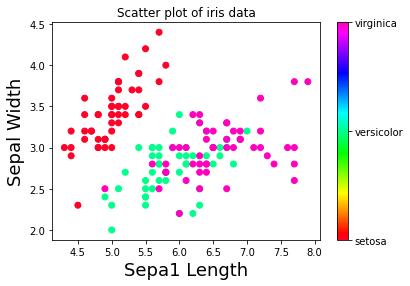

In [7]:
y_names = ['setosa', 'versicolor', 'virginica']
formatter = plt.FuncFormatter(lambda i, *args: y_names[int(i)])
fig, ax = plt.subplots() 

y_plot = plt.scatter(X["SepalLengthCm"], X["SepalWidthCm"], c = y, cmap='gist_rainbow', label = y)
fig.colorbar(y_plot, ticks=[0, 1, 2], format=formatter)
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.title("Scatter plot of iris data")

**Create Elbow Plot**

The k-means algorithm requires that the value of K, the number of
clusters, to be specified. To determine a good value for K, we will use the “elbow” method. This
method involves applying k-means, using different values for k, and calculating the Within-cluster
Sum-of-Squared Error (WSSE)

In [8]:
# Within-cluster Sum-of-Squared Error
WSSE = {} 
for K in range(1, 10):
    K_means = KMeans(n_clusters = K, max_iter = 1000).fit(X)
    # Inertia: Sum of distances of samples to their closest cluster center
    WSSE[K] = K_means.inertia_ 

The values for K are plotted against the WSSE values, and the elbow, or bend in the curve, provides a good estimate for the value for K.

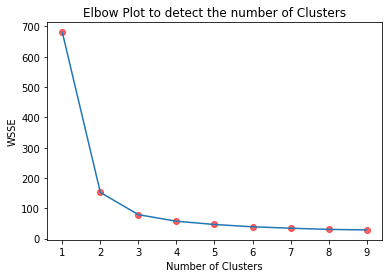

In [9]:
plt.figure()
plt.plot(list(WSSE.keys()), list(WSSE.values()))
plt.scatter(WSSE.keys(), WSSE.values(),marker = 'o', c = 'red', alpha = 0.6)
plt.title("Elbow Plot to detect the number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WSSE")
plt.show()

In this plot, we see that the elbow in the curve is between 2 and 4, so let's choose **K = 3**. We will use this value to set the **Number of clusters = 3**

In [10]:
# Fitting the Model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# Making predictions
predictions = kmeans.fit_predict(X)

In [12]:
# Identifying centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

**Visualizing the Clusters**

Text(0.5, 1.0, 'Predicted')

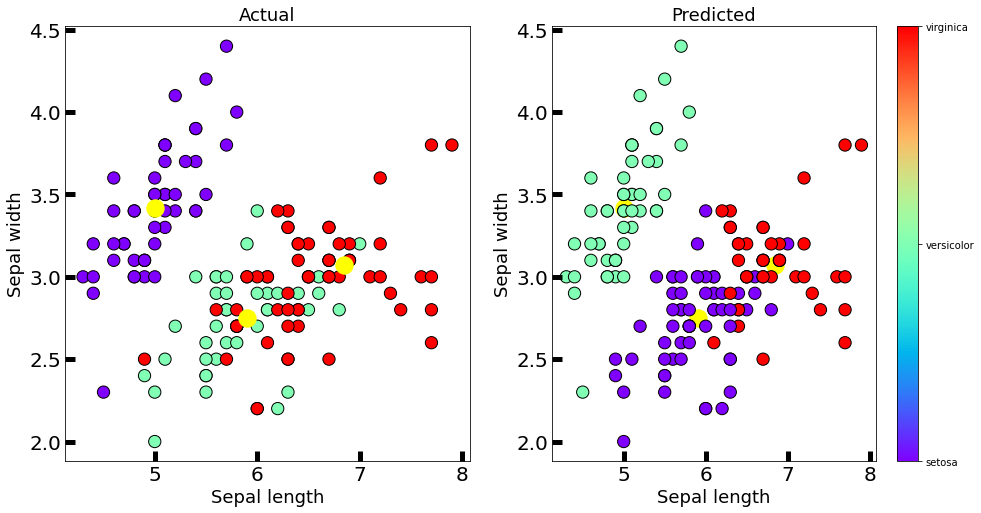

In [13]:
new_labels = kmeans.labels_
formatter = plt.FuncFormatter(lambda i, *args: y_names[int(i)])
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Dividing Plot to 2 axes to display Actual & Predicted Clusters

# Axis 0

ax0 = axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow',edgecolor='k', s=150, label = y)
fig.colorbar(ax0, ticks=[0, 1, 2], format=formatter)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

# Axes 1

axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow')
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='rainbow',edgecolor='k', s=150, label = y)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

**OPTIMUM NUMBER OF CLUSTERS = 3**